In [1]:
import torch
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np

# Change path.
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

from src.experiment import Experiment
from src.utils import cross_entropy_for_onehot

In [2]:
torch.cuda.is_available()

True

### Set params

In [89]:
params = {
    "num_epochs": 501,
    "data": "CIFAR",
    "index": 15,
    "batch_size": 1,
    "n_repeats": 1,
    "init_type": "gaussian_shift2",
    "measure": "euclidean",
    "Q": 1,
    "val_size": 100,
    "lr": 0.01,
#     "sigma": 1000,
    "nn": "LeNet"
}

Approx Sigma size for LeNet: 0.0063207196071743965

Approx Sigma size for ResNet: 0.001787270070053637

### Run experiment

In [42]:
torch.manual_seed(42)
random.seed(10)
exp = Experiment(params, rand_ims=True)

Running on cuda
Files already downloaded and verified


In [43]:
%timeit -n1 -r1 exp.train()

0 400.4523925781
20 1.2081762552
40 0.0535097830
60 0.0126832556
80 0.0055339988
100 0.0034306662
30.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


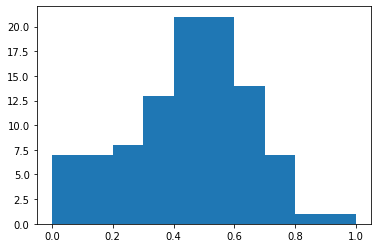

In [35]:
dummy_data, dummy_label = exp.init_data()

# with torch.no_grad():
#     dist = (dummy_label.amax(dim=(1), keepdim=True) - dummy_label.amin(dim=(1), keepdim=True))
#     dist[dist==0.] = 1.
#     scale = 1.0 /  dist
#     dummy_label.mul_(scale).sub_(dummy_label.amin(dim=(1), keepdim=True))

plt.hist(dummy_label[0].detach().cpu().numpy().reshape(-1))
plt.show()

# Run experiment for all single image 

In [11]:
seed = 12345

### Gaussian-Euclidean

Running on cuda
Files already downloaded and verified


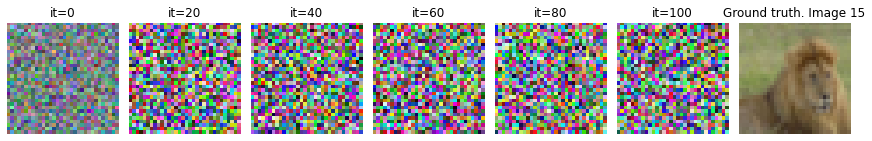

In [5]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'gaussian_shift2'
params['measure'] = 'euclidean'
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
exp.make_reconstruction_plots()

### Gaussian-Gaussian

Running on cuda
Files already downloaded and verified


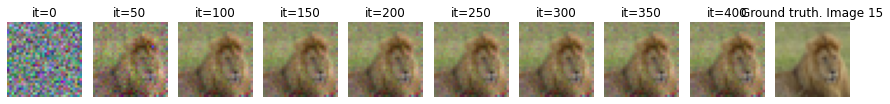

In [12]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'gaussian_shift2'
params['measure'] = 'gaussian'
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
gg_losss = exp.losses['mse']
exp.make_reconstruction_plots()

### Uniform-Euclidean

Running on cuda
Files already downloaded and verified


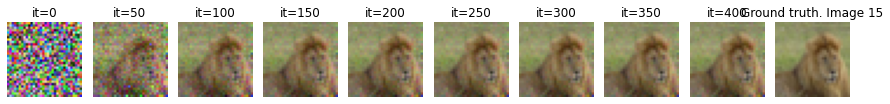

In [13]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'uniform'
params['measure'] = 'euclidean'
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
ue_losss = exp.losses['mse']
exp.make_reconstruction_plots()

### Uniform-Gaussian

Running on cuda
Files already downloaded and verified


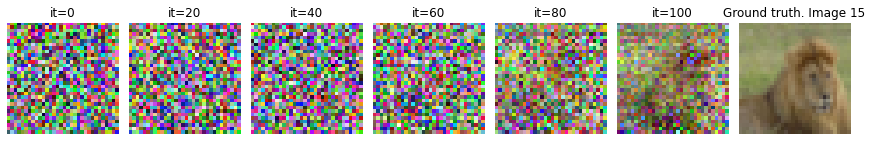

In [11]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'uniform'
params['measure'] = 'gaussian'
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
exp.make_reconstruction_plots()

In [31]:
losses = exp.losses
losses['mse']

[[1.3708203043372036,
  2.9609169151965347,
  3.7408677640761336,
  4.40279425010493,
  5.07420834108835,
  5.655444635891878]]

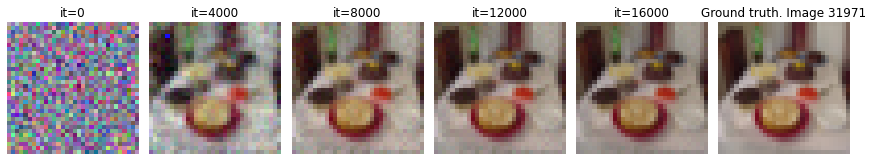

In [10]:
exp.make_reconstruction_plots()

In [11]:
losses = exp.losses
losses['mse']

[[0.07077062694264925,
  0.004414885412943091,
  0.0006570646188885752,
  0.00041814734440161926,
  0.0011749303011986886]]

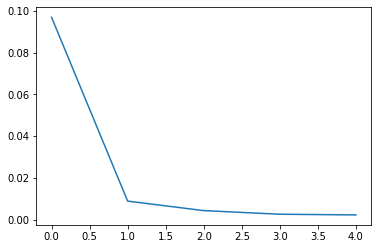

In [19]:
plt.plot(range(len(losses['mse'][0])), losses['mse'][0])

### Temp

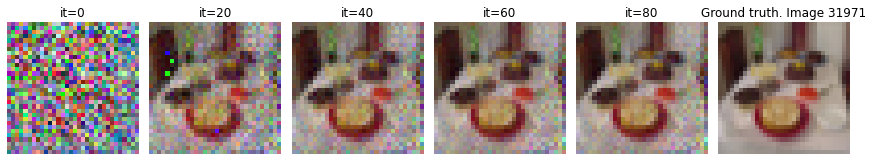

In [17]:
exp.make_reconstruction_plots()

In [18]:
losses = exp.losses
losses['mse']

[[0.09698254558284397,
  0.008839709028375475,
  0.004278271501735591,
  0.0025396978114763376,
  0.002215441425304795]]

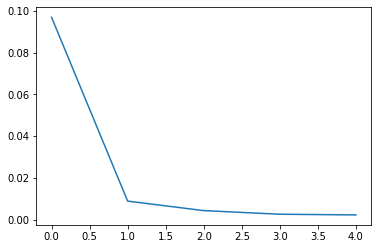

In [19]:
plt.plot(range(len(losses['mse'][0])), losses['mse'][0])

### Investigate gradients

In [40]:
dummy_data, dummy_label = exp.init_data()
dummy_pred = exp.net(dummy_data)
dummy_onehot_label = F.softmax(dummy_label, dim=-1)
dummy_loss = cross_entropy_for_onehot(dummy_pred, dummy_onehot_label)
dummy_dy_dx = torch.autograd.grad(dummy_loss, exp.net.parameters(), create_graph=True)

In [ ]:
exp.original_dy_dx[0].numpy().reshape(-1)

In [32]:
torch.var(exp.original_dy_dx[2])

tensor(0.0306)

In [50]:
np.exp(-95.74013/0.03058373)

0.0

In [31]:
np.var(exp.original_dy_dx[2].numpy().reshape(-1))

0.03058373

In [43]:
np.var(dummy_dy_dx[2].detach().numpy().reshape(-1))

0.019970989

In [55]:
np.sum((dummy_dy_dx[4].detach().numpy() - exp.original_dy_dx[4].numpy())

6.8574905

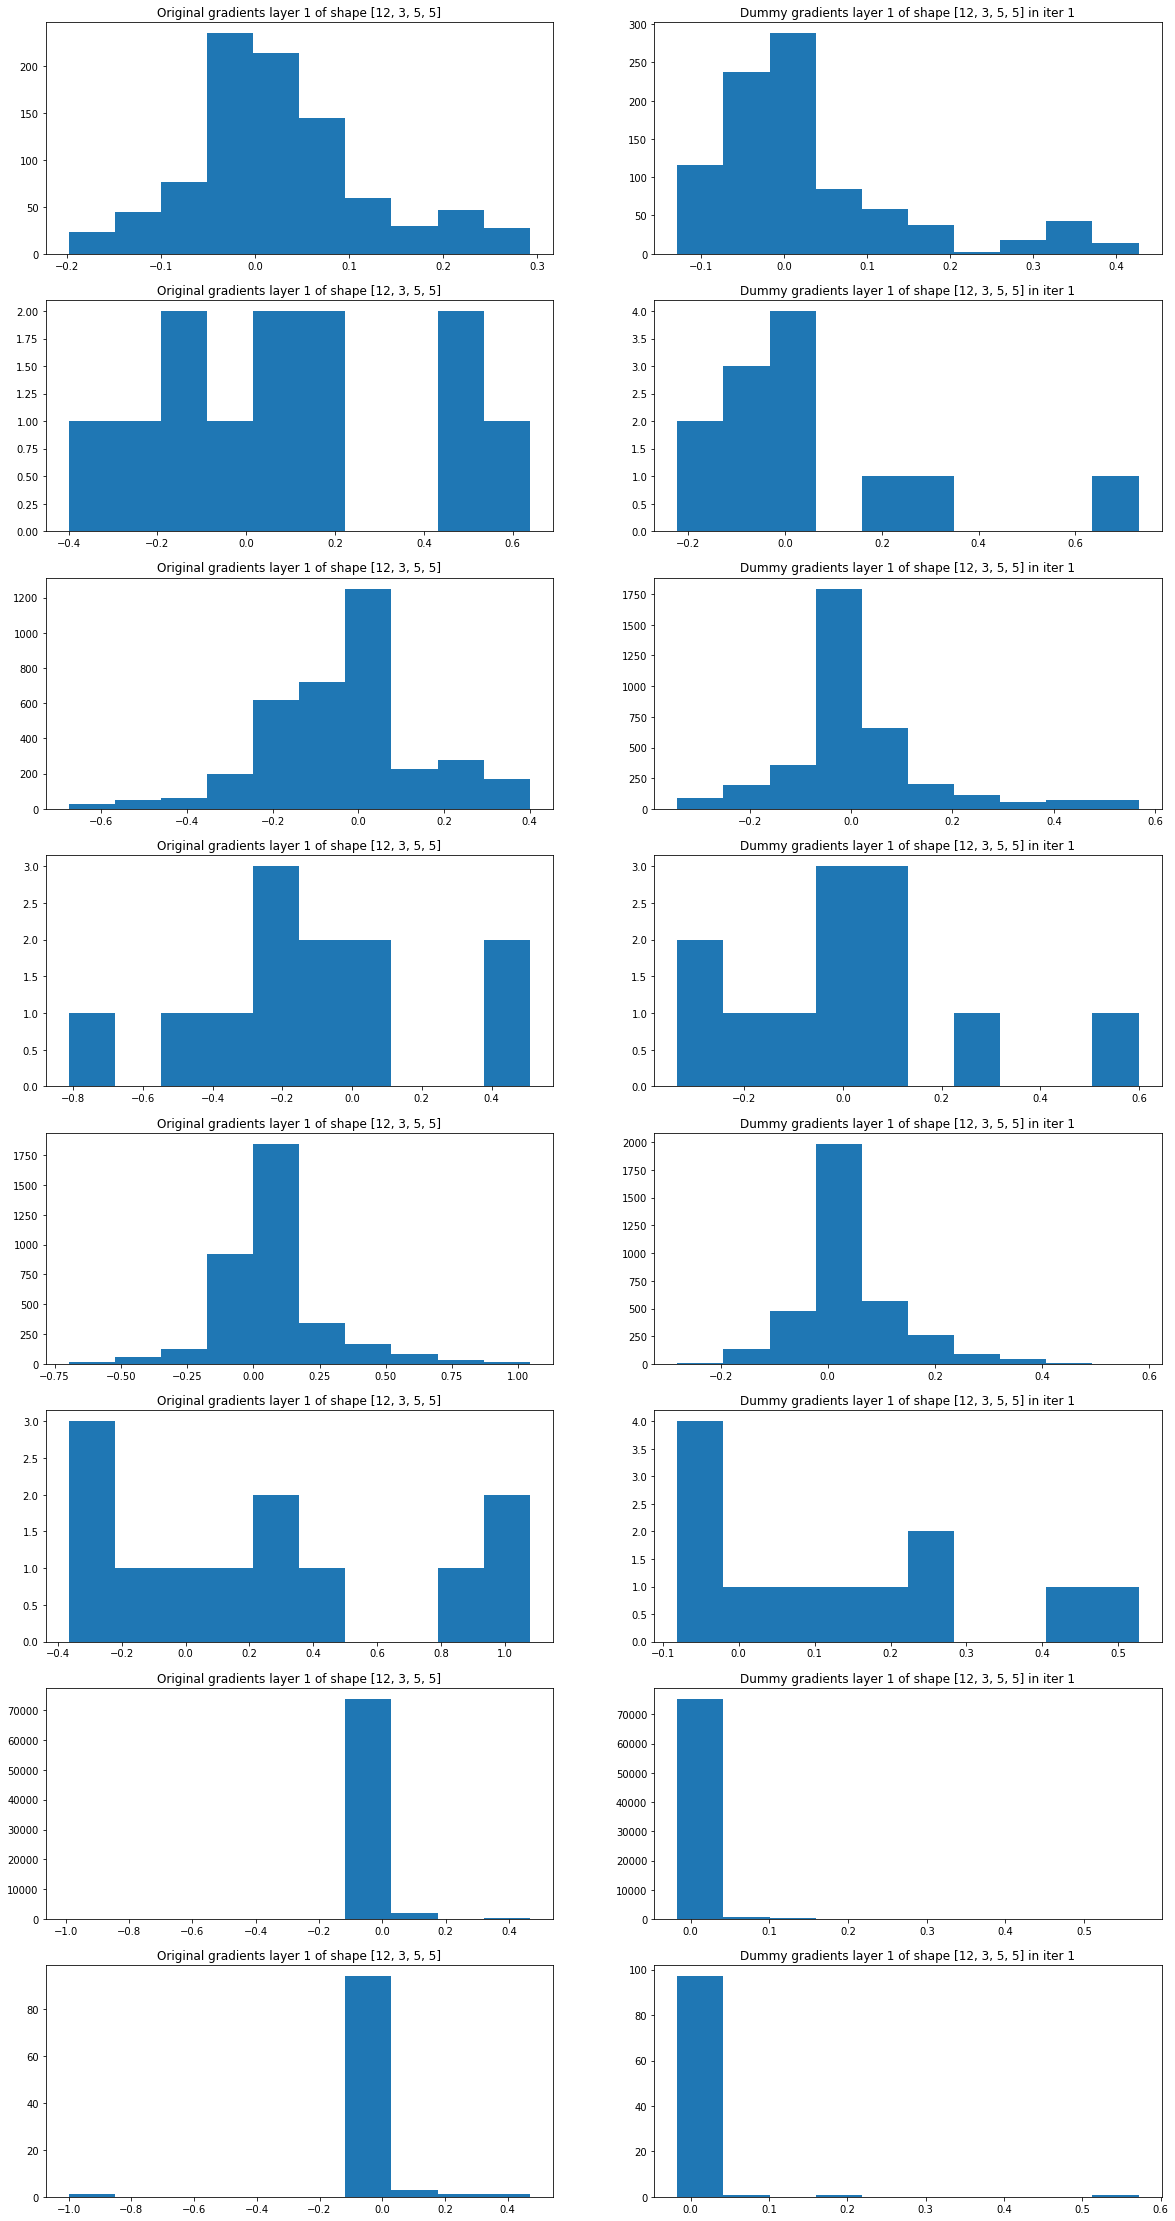

In [64]:
fig, axes = plt.subplots(8, 2, figsize=(20,40))
for i, ax in enumerate(axes):
    ax[0].set_title("Original gradients layer 1 of shape [12, 3, 5, 5]")
    ax[0].hist(exp.original_dy_dx[i].detach().numpy().reshape(-1))
    ax[1].set_title("Dummy gradients layer 1 of shape [12, 3, 5, 5] in iter 1")
    ax[1].hist(dummy_dy_dx[i].detach().numpy().reshape(-1))
plt.show()

# Resnet example

### Gaussian - euclidean

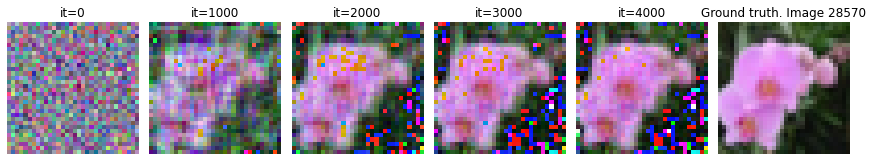

In [11]:
exp.make_reconstruction_plots()

### Gaussian - gaussian

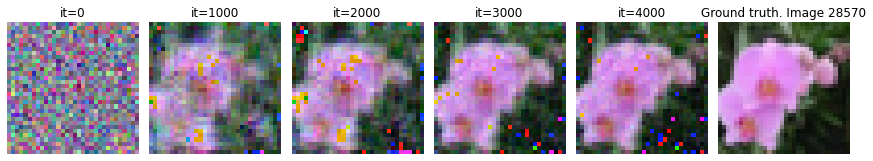

In [17]:
exp.make_reconstruction_plots()

### Uniform - euclidean

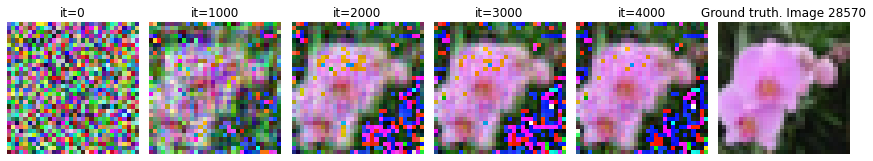

In [6]:
exp.make_reconstruction_plots()

### Uniform- gaussian

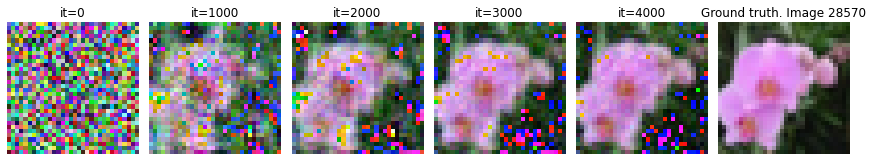

In [21]:
exp.make_reconstruction_plots()

# Find the lion

In [93]:
from torchvision import datasets
dst = datasets.CIFAR100("~/.torch", download=True, train=True)

Files already downloaded and verified


0


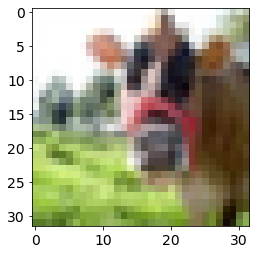

1


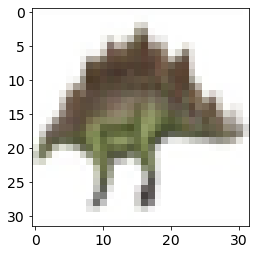

2


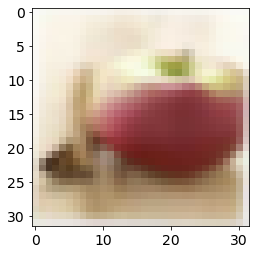

3


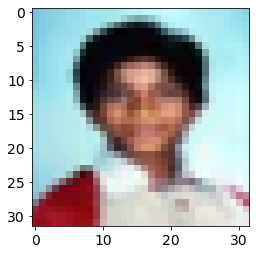

4


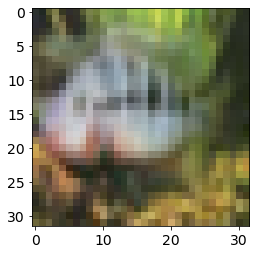

5


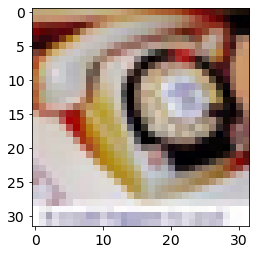

6


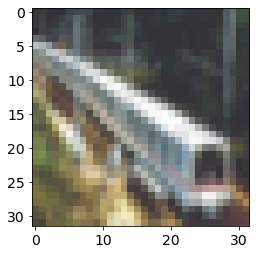

7


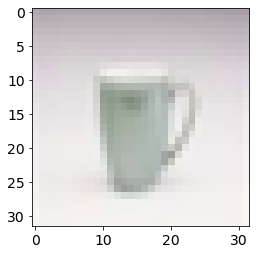

8


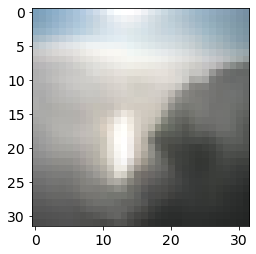

9


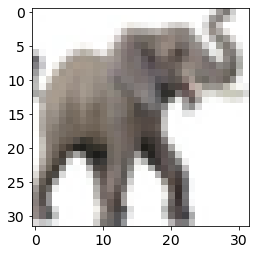

In [94]:
for i in range(0, 10):
    print(i)
    plt.imshow(dst[i][0])
    plt.show()
# plt.imshow(dst[15][0])

# Recreate figure 5

### Gaussian-Gaussian

{'num_epochs': 501, 'data': 'CIFAR', 'index': 15, 'batch_size': 1, 'n_repeats': 1, 'init_type': 'gaussian_shift2', 'measure': 'gaussian', 'Q': 1, 'val_size': 100, 'lr': 0.01, 'nn': 'LeNet'}
Running on cuda
Files already downloaded and verified


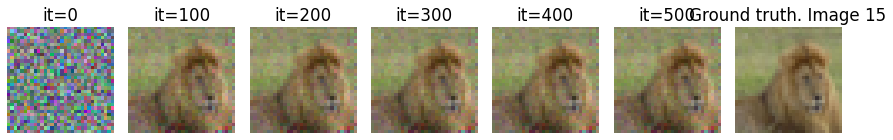

In [91]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'gaussian_shift2'
params['measure'] = 'gaussian'
print(params)
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
# gg_losss = exp.losses['mse']
exp.make_reconstruction_plots()

### Uniform-Euclidean

Running on cuda
Files already downloaded and verified


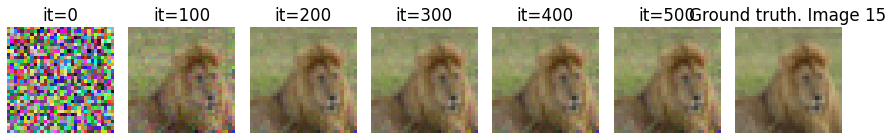

In [90]:
torch.manual_seed(seed)
random.seed(seed)
params['init_type'] = 'uniform'
params['measure'] = 'euclidean'
exp = Experiment(params, rand_ims=False, verbose=False)
exp.train()
# ue_losss = exp.losses['mse']
exp.make_reconstruction_plots()

### Plot

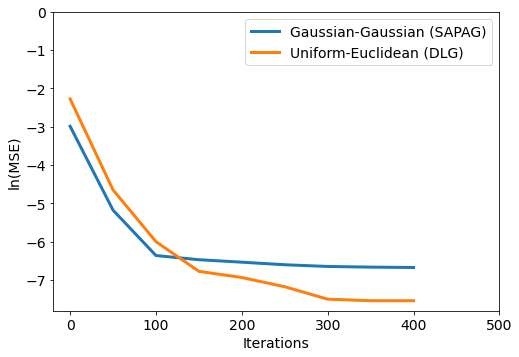

In [84]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1,1, figsize=(8,5.5))

gg_mse = np.log(gg_losss[0])
ue_mse = np.log(ue_losss[0])

iters = [0, 50, 100, 150, 200, 250, 300, 350, 400]
ax.plot(iters, gg_mse, label="Gaussian-Gaussian (SAPAG)", linewidth=3)
ax.plot(iters, ue_mse, label="Uniform-Euclidean (DLG)", linewidth=3)

ax.legend()
ax.set_ylabel('ln(MSE)')
ax.set_xlabel('Iterations')
ax.set_xticks([0, 100, 200, 300, 400, 500])
ax.set_yticks([0,-1,-2, -3, -4, -5, -6, -7])
# ax.set_yscale('log')
# ax.grid(True)
plt.savefig('recreate_fig_5.pdf', bbox_inches='tight')